# Libs

In [13]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Masking
import matplotlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from WickelfeaturesProject.keras_metrics import KerasMetrics
from keras.optimizers import adam
import keras.backend as K
from sklearn.metrics import f1_score
from scipy.spatial import distance
opt = adam()

# Data

corpus = pd.read_csv("WickelfeaturesProject/Corpus new coding/corpus_complete.csv", names=['verb0', 'inf_verb', 'conj_verb0', 'conj_verb'])

corpus.drop(['verb0','conj_verb0'], axis=1,inplace=True)

corpus['conj_verb'] = corpus.conj_verb.apply(lambda x: x.strip('#'))

corpus['inf_verb'] = corpus.inf_verb.apply(lambda x: x.strip('#'))

corpus.to_csv('WickelfeaturesProject/Corpus new coding/actual_corpus_used', index=False)

In [5]:
corpus = pd.read_csv('WickelfeaturesProject/Corpus new coding/actual_corpus_used' )

# Features

In [6]:
features = ['oclusiva', 'nasal', 'tepe', 'fricativa', 'l-aprox', 'bilabial', 'labiodental',
           'alveolar', 'p-alveolar', 'palatal', 'velar', 'glotal', 'vozeada', 'fechada',
           'm-fechada', 'm-aberta', 'aberta', 'anterior', 'posterior']

In [7]:
#http://www.ipachart.com/
phones = {
"p" : ['bilabial', 'oclusiva'],
"b" : ['bilabial', 'oclusiva', 'vozeada'],
"f" : ['labiodental', 'fricativa'],
"v" : ['labiodental', 'fricativa', 'vozeada'],
"t" : ['alveolar', 'oclusiva'],
"d" : ['alveolar', 'oclusiva', 'vozeada'],
"m" : ['bilabial', 'nasal'],
"n" : ['alveolar', 'nasal'],
"k" : ['velar', 'oclusiva'],
"g" : ['velar', 'oclusiva', 'vozeada'],
"N" : ['nasal', 'palatal'],
"r" : ['alveolar', 'tepe'],
"s" : ['alveolar', 'fricativa'],
"z" : ['alveolar', 'fricativa', 'vozeada'],
"j" : ['p-alveolar', 'fricativa', 'vozeada'],
"l" : ['l-aprox', 'p-alveolar'],
"L" : ['l-aprox', 'palatal'],
"h" : ['glotal', 'fricativa'],
"x" : ['fricativa', 'p-alveolar'],
"i" : ['anterior', 'fechada'],
"e" : ['m-fechada', 'anterior'],
"E" : ['m-aberta', 'anterior'],
"a" : ['anterior', 'aberta'],
"u" : ['posterior', 'fechada'],
"o" : ['m-fechada', 'posterior'],
"O" : ['m-aberta', 'posterior'],
"A" : ['anterior', 'aberta', 'nasal'],
"3" : ['m-fechada', 'anterior', 'nasal']}

# Functions

In [9]:
def code(phone): 
    array = []
    for item in features:
        if item in phones[phone]:
            array.append(1)
        else:
            array.append(0)
    return np.array(array)

In [122]:
code('h')

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [123]:
def code_verb(verb):
    coded = list()
    for item in verb:
        coded.append(code(item))
    return coded

In [124]:
#code_verb('falu')

[array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])]

In [125]:
# def verify(verb):
#     for phone in verb:
#         if phone not in phones.keys():
#             print(phone, verb)
#         else:
#             None

In [126]:
phones.keys()

dict_keys(['p', 'b', 'f', 'v', 't', 'd', 'm', 'n', 'k', 'g', 'N', 'r', 's', 'z', 'j', 'l', 'L', 'h', 'x', 'i', 'e', 'E', 'a', 'u', 'o', 'O', 'A', '3'])

In [17]:
# corpus.inf_verb.apply(verify)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
393    None
394    None
395    None
396    None
397    None
398    None
399    None
400    None
401    None
402    None
403    None
404    None
405    None
406    None
407    None
408    None
409    None
410    None
411    None
412    None
413    None
414    None
415    None
416    None
417    None
418    None
419    None
420    None
421    None
422    None
Name: inf_verb, Length: 423, dtype: object

# Maximum Length of input and output

In [127]:
corpus.inf_verb.str.len().max()

11

In [128]:
corpus.conj_verb.str.len().max()

11

# Padding

In [129]:
coded_in = corpus.inf_verb.apply(code_verb)

In [130]:
coded_out = corpus.conj_verb.apply(code_verb)

In [ ]:
# # define sequences
# sequences = [
#     [1, 2, 3, 4],
#        [1, 2, 3],
#              [1]
#     ]
# # pad sequence

In [131]:
padded_in = pad_sequences(coded_in, value=np.zeros(19))
padded_out = pad_sequences(coded_out, value=np.zeros(19),padding="post")

In [132]:
padded_out = pad_sequences(coded_out, value=np.zeros(19),padding="post")
padded_out.shape

(423, 11, 19)

about pre padding: https://stackoverflow.com/questions/46298793/how-does-choosing-between-pre-and-post-zero-padding-of-sequences-impact-results

# Test Split

In [133]:
x_test = padded_in[-30:]
y_test = padded_out[-30:]

padded_in = padded_in[:-30]
padded_out = padded_out[:-30]

# The Network

In [187]:
latent_dim = 256
num_encoder_tokens = 19

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens)) #19
#encoder_inputs = Masking()(encoder_inputs) # Assuming PAD is zeros
encoder = LSTM(latent_dim, return_state=True)
# Now the LSTM will ignore the PADs when encoding
# by skipping those timesteps that are masked
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
num_decoder_tokens = 19
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='sigmoid')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [135]:
num_encoder_tokens

19

In [136]:
padded_out[0]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [137]:
coded_out_target = coded_out.apply(lambda x: np.vstack((x[1:],np.zeros(19))))

In [147]:
padded_out.shape

(393, 11, 19)

In [138]:
padded_out_target = pad_sequences(coded_out_target, value=np.zeros(19),padding="post")

In [139]:
padded_out_target.shape

(423, 11, 19)

In [148]:
#because of test split
padded_out_target = padded_out_target[:-30]

In [142]:
def mean_pred(y_true, y_pred):
    print(K.shape(y_true))
    return K.mean(y_pred[y_true == 1])

In [143]:
def mean_pred(y_true, y_pred):
    
    return K.mean(y_pred[y_true == 1])

In [188]:
%%time
# Run training
keras_metrics = KerasMetrics()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[ keras_metrics.fbeta_score,
               keras_metrics.recall,
               keras_metrics.precision]) #, mean_pred],)
history2 = model.fit([padded_in, padded_out],
                    padded_out_target,
                    batch_size=128,
                    epochs=200,
                    validation_split=0.2,verbose=True)

Train on 314 samples, validate on 79 samples
Epoch 1/200
314/314 [==============================] - 5s 16ms/step - loss: 0.6588 - fbeta_score: 0.0826 - recall: 0.2311 - precision: 0.0933 - val_loss: 0.2934 - val_fbeta_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
314/314 [==============================] - 0s 450us/step - loss: 0.2372 - fbeta_score: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2016 - val_fbeta_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
314/314 [==============================] - 0s 513us/step - loss: 0.1884 - fbeta_score: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1836 - val_fbeta_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
314/314 [==============================] - 0s 504us/step - loss: 0.1703 - fbeta_score: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1824 - val_fbeta_score: 0.00

314/314 [==============================] - 0s 418us/step - loss: 0.0755 - fbeta_score: 0.6683 - recall: 0.5545 - precision: 0.8425 - val_loss: 0.1210 - val_fbeta_score: 0.5159 - val_recall: 0.3996 - val_precision: 0.7276
Epoch 71/200
314/314 [==============================] - 0s 498us/step - loss: 0.0747 - fbeta_score: 0.6580 - recall: 0.5337 - precision: 0.8578 - val_loss: 0.1189 - val_fbeta_score: 0.5251 - val_recall: 0.4170 - val_precision: 0.7087
Epoch 72/200
314/314 [==============================] - 0s 463us/step - loss: 0.0740 - fbeta_score: 0.6754 - recall: 0.5636 - precision: 0.8429 - val_loss: 0.1331 - val_fbeta_score: 0.4610 - val_recall: 0.3450 - val_precision: 0.6945
Epoch 73/200
314/314 [==============================] - 0s 468us/step - loss: 0.0759 - fbeta_score: 0.6571 - recall: 0.5371 - precision: 0.8468 - val_loss: 0.1262 - val_fbeta_score: 0.4926 - val_recall: 0.3821 - val_precision: 0.6931
Epoch 74/200
314/314 [==============================] - 0s 474us/step - loss:

314/314 [==============================] - 0s 367us/step - loss: 0.0513 - fbeta_score: 0.8019 - recall: 0.7298 - precision: 0.8902 - val_loss: 0.1132 - val_fbeta_score: 0.6251 - val_recall: 0.5251 - val_precision: 0.7721
Epoch 106/200
314/314 [==============================] - 0s 337us/step - loss: 0.0507 - fbeta_score: 0.8015 - recall: 0.7227 - precision: 0.8997 - val_loss: 0.1152 - val_fbeta_score: 0.6028 - val_recall: 0.4978 - val_precision: 0.7638
Epoch 107/200
314/314 [==============================] - 0s 545us/step - loss: 0.0505 - fbeta_score: 0.7988 - recall: 0.7223 - precision: 0.8937 - val_loss: 0.1163 - val_fbeta_score: 0.6074 - val_recall: 0.5033 - val_precision: 0.7658
Epoch 108/200
314/314 [==============================] - 0s 511us/step - loss: 0.0500 - fbeta_score: 0.8017 - recall: 0.7243 - precision: 0.8978 - val_loss: 0.1114 - val_fbeta_score: 0.6266 - val_recall: 0.5240 - val_precision: 0.7792
Epoch 109/200
314/314 [==============================] - 0s 477us/step - l

Epoch 140/200
314/314 [==============================] - 0s 430us/step - loss: 0.0343 - fbeta_score: 0.8888 - recall: 0.8408 - precision: 0.9427 - val_loss: 0.1169 - val_fbeta_score: 0.6696 - val_recall: 0.5841 - val_precision: 0.7845
Epoch 141/200
314/314 [==============================] - 0s 515us/step - loss: 0.0338 - fbeta_score: 0.8905 - recall: 0.8447 - precision: 0.9415 - val_loss: 0.1175 - val_fbeta_score: 0.6675 - val_recall: 0.5808 - val_precision: 0.7847
Epoch 142/200
314/314 [==============================] - 0s 464us/step - loss: 0.0334 - fbeta_score: 0.8923 - recall: 0.8475 - precision: 0.9423 - val_loss: 0.1162 - val_fbeta_score: 0.6742 - val_recall: 0.5884 - val_precision: 0.7892
Epoch 143/200
314/314 [==============================] - 0s 484us/step - loss: 0.0329 - fbeta_score: 0.8950 - recall: 0.8513 - precision: 0.9435 - val_loss: 0.1184 - val_fbeta_score: 0.6675 - val_recall: 0.5819 - val_precision: 0.7827
Epoch 144/200
314/314 [==============================] - 0s 

Epoch 175/200
314/314 [==============================] - 0s 472us/step - loss: 0.0235 - fbeta_score: 0.9373 - recall: 0.9087 - precision: 0.9676 - val_loss: 0.1171 - val_fbeta_score: 0.6984 - val_recall: 0.6245 - val_precision: 0.7922
Epoch 176/200
314/314 [==============================] - 0s 428us/step - loss: 0.0232 - fbeta_score: 0.9391 - recall: 0.9135 - precision: 0.9662 - val_loss: 0.1226 - val_fbeta_score: 0.6911 - val_recall: 0.6070 - val_precision: 0.8023
Epoch 177/200
314/314 [==============================] - 0s 349us/step - loss: 0.0231 - fbeta_score: 0.9368 - recall: 0.9061 - precision: 0.9695 - val_loss: 0.1211 - val_fbeta_score: 0.7013 - val_recall: 0.6255 - val_precision: 0.7981
Epoch 178/200
314/314 [==============================] - 0s 393us/step - loss: 0.0227 - fbeta_score: 0.9400 - recall: 0.9161 - precision: 0.9652 - val_loss: 0.1187 - val_fbeta_score: 0.7010 - val_recall: 0.6234 - val_precision: 0.8008
Epoch 179/200
314/314 [==============================] - 0s 

In [189]:
history2.history.keys()

dict_keys(['val_loss', 'val_fbeta_score', 'val_recall', 'val_precision', 'loss', 'fbeta_score', 'recall', 'precision'])

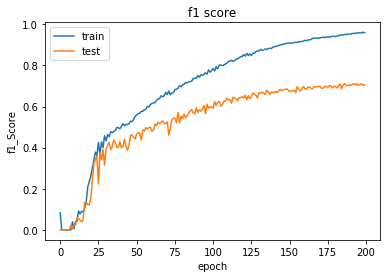

In [190]:
# summarize history for accuracy
plt.plot(history2.history['fbeta_score'])
plt.plot(pd.Series(history2.history['val_fbeta_score']))
plt.title('f1 score')
plt.ylabel('f1_Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [195]:
history2.history['val_fbeta_score'][-1]

0.7047267556190491

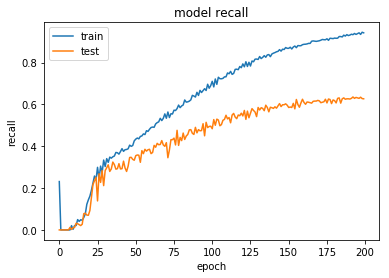

In [191]:
# summarize history for accuracy
score = 'recall'
plt.plot(history2.history[score])
plt.plot(pd.Series(history2.history['val_{}'.format(score)]))
plt.title('model {}'.format(score))
plt.ylabel(score)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [196]:
history2.history['val_recall'][-1]

0.6266375780105591

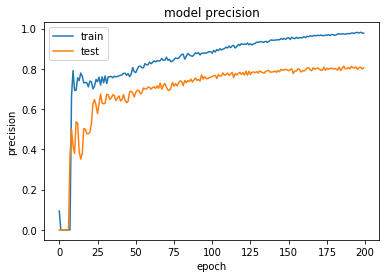

In [192]:
score = 'precision'
plt.plot(history2.history[score])
plt.plot(pd.Series(history2.history['val_{}'.format(score)]))
plt.title('model {}'.format(score))
plt.ylabel(score)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [197]:
history2.history['val_precision'][-1]

0.8050490617752075

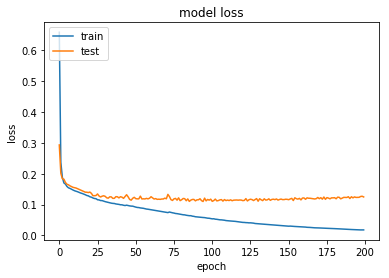

In [193]:
%matplotlib inline
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

# Predict

## Euclidean Distance

from scipy.spatial import distance
a = np.array([0,0,1])
b = np.array([0, 0, 1])
dst = distance.euclidean(a, b)
dst

phone_arrays = {}
for phone in phones:
    phone_arrays[phone] = code(phone)
phone_arrays

import pickle
with open('WickelfeaturesProject/Files/phone_arrays.pickle', 'wb') as file:
    pickle.dump(phone_arrays, file, protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
def find_closest_array(predicted):
    """
    Find closest array.
    
    Parameters:
    ----------   
    predicted : type array
    
    Returns:
    -------
    candidate : type string
    """
    min_dst = 10000
    candidates = []
    import pickle 
    with open('WickelfeaturesProject/Files/phone_arrays.pickle', 'rb') as file:
        phone_arrays = pickle.load(file)
    
    for phone in phone_arrays:
        dst = distance.euclidean(predicted, phone_arrays[phone])
        # finds the minimum distance first
        if dst < min_dst:
            min_dst = dst
            
    for phone in phone_arrays:
            dst = distance.euclidean(predicted, phone_arrays[phone])
            if dst == min_dst:
                # appends all possible candidates to a list
                candidates.append(phone)
    if len(candidates) > 1:
        return '(' + ''.join(candidates) + ')'
    else:
        return ''.join(candidates)

In [63]:
# test if it returns 3
find_closest_array([0,1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

'3'

In [64]:
# test if it returns a list
find_closest_array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

'(ptk)'

 ---

In [ ]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [116]:
del phones

{'p': ['bilabial', 'oclusiva'],
 'b': ['bilabial', 'oclusiva', 'vozeada'],
 'f': ['labiodental', 'fricativa'],
 'v': ['labiodental', 'fricativa', 'vozeada'],
 't': ['alveolar', 'oclusiva'],
 'd': ['alveolar', 'oclusiva', 'vozeada'],
 'm': ['bilabial', 'nasal'],
 'n': ['alveolar', 'nasal'],
 'k': ['velar', 'oclusiva'],
 'g': ['velar', 'oclusiva', 'vozeada'],
 'N': ['nasal', 'palatal'],
 'r': ['alveolar', 'tepe'],
 's': ['alveolar', 'fricativa'],
 'z': ['alveolar', 'fricativa', 'vozeada'],
 'j': ['p-alveolar', 'fricativa', 'vozeada'],
 'l': ['l-aprox', 'p-alveolar'],
 'L': ['l-aprox', 'palatal'],
 'h': ['glotal', 'fricativa'],
 'x': ['fricativa', 'p-alveolar'],
 'i': ['anterior', 'fechada'],
 'e': ['m-fechada', 'anterior'],
 'E': ['m-aberta', 'anterior'],
 'a': ['anterior', 'aberta'],
 'u': ['posterior', 'fechada'],
 'o': ['m-fechada', 'posterior'],
 'O': ['m-aberta', 'posterior'],
 'A': ['anterior', 'aberta', 'nasal'],
 '3': ['m-fechada', 'anterior', 'nasal'],
 'PAD': array([0., 0., 0.,

In [114]:
lookup = dict()
phones['PAD'] = np.zeros(19)
for phone in phones:
    lookup[phone] = code(phone)
    

/disk1/home/svo6059/anaconda3/envs/bia/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [112]:
def reverse_phone(array):
    for item in lookup:
        if np.all(array == lookup[item]):
            return item

In [110]:
coded_in[0][0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [111]:
reverse_phone(coded_in[0][0])

'A'

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 11, 19))
    # Populate the first character of target sequence with the start character.
    # target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_word = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence